In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("gld_price_data.csv")

In [4]:
df

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,5/8/2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118


In [5]:
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
df.shape

(2290, 6)

In [8]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [9]:
# find the unique values from the categorical features
for col in df.select_dtypes(include = "object").columns:
    print(col)
    print(df[col].unique()) 

Date
['1/2/2008' '1/3/2008' '1/4/2008' ... '5/10/2018' '5/14/2018' '5/16/2018']


In [10]:
# finding missing values in data set 
features_na = [feature for features in df.columns if df[features].isnull().sum() > 0]
for features in features_na:
    print(features, np.round(df[feature].isnull().mean(),4), " % missing values")
else :
    print(" No missing values ")

 No missing values 


In [11]:
# finding misssing missing values 
for column in df.columns:
    print(column,df[column].nunique())

Date 2290
SPX 2277
GLD 1930
USO 1514
SLV 1331
EUR/USD 2066


In [12]:
# categorial values in data in dataset 
categorical_features = [feature for feature in df.columns if ((df[feature].dtypes == "o") & (feature not in ["GLD"]))]
print(categorical_features)

[]


In [13]:
for feature in categorical_features:
    print("The feature is {} and number of categorical are {}".format (feauture,len(df[feature].unique())))

In [14]:
# Explore the numerical features
# List of numerical features
numerical_features = [feature for feature in df.columns if ((df[feature].dtypes != "object") and (feature not in ['GLD']))]
print("Number of numerical variables:", len(numerical_features))

# Visualize the numerical variables
df[numerical_features].head()


Number of numerical variables: 4


,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.180,1.471692
1,1447.160034,78.370003,15.285,1.474491
2,1411.630005,77.309998,15.167,1.475492
3,1416.180054,75.500000,15.053,1.468299
4,1390.189941,76.059998,15.590,1.557099


In [15]:
discrete_features = [feature for feature in numerical_features if len(df[feature].unique())<25]
print("Descrete Variables Count: {}".format(len(discrete_features)))

Descrete Variables Count: 0


In [16]:
continuous_features = [feature for feature in numerical_features if feature not in discrete_features + ["GLD"]]
print("Continuous features Count: {}".format(len(continuous_features)))


Continuous features Count: 4


C:\Users\mulak\AppData\Local\Temp\ipykernel_10392\4286273125.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[continuous_feature])
C:\Users\mulak\AppData\Local\Temp\ipykernel_10392\4286273125.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[continuous_feature])


C:\Users\mulak\AppData\Local\Temp\ipykernel_10392\4286273125.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[continuous_feature])
C:\Users\mulak\AppData\Local\Temp\ipykernel_10392\4286273125.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[continuous_feature])


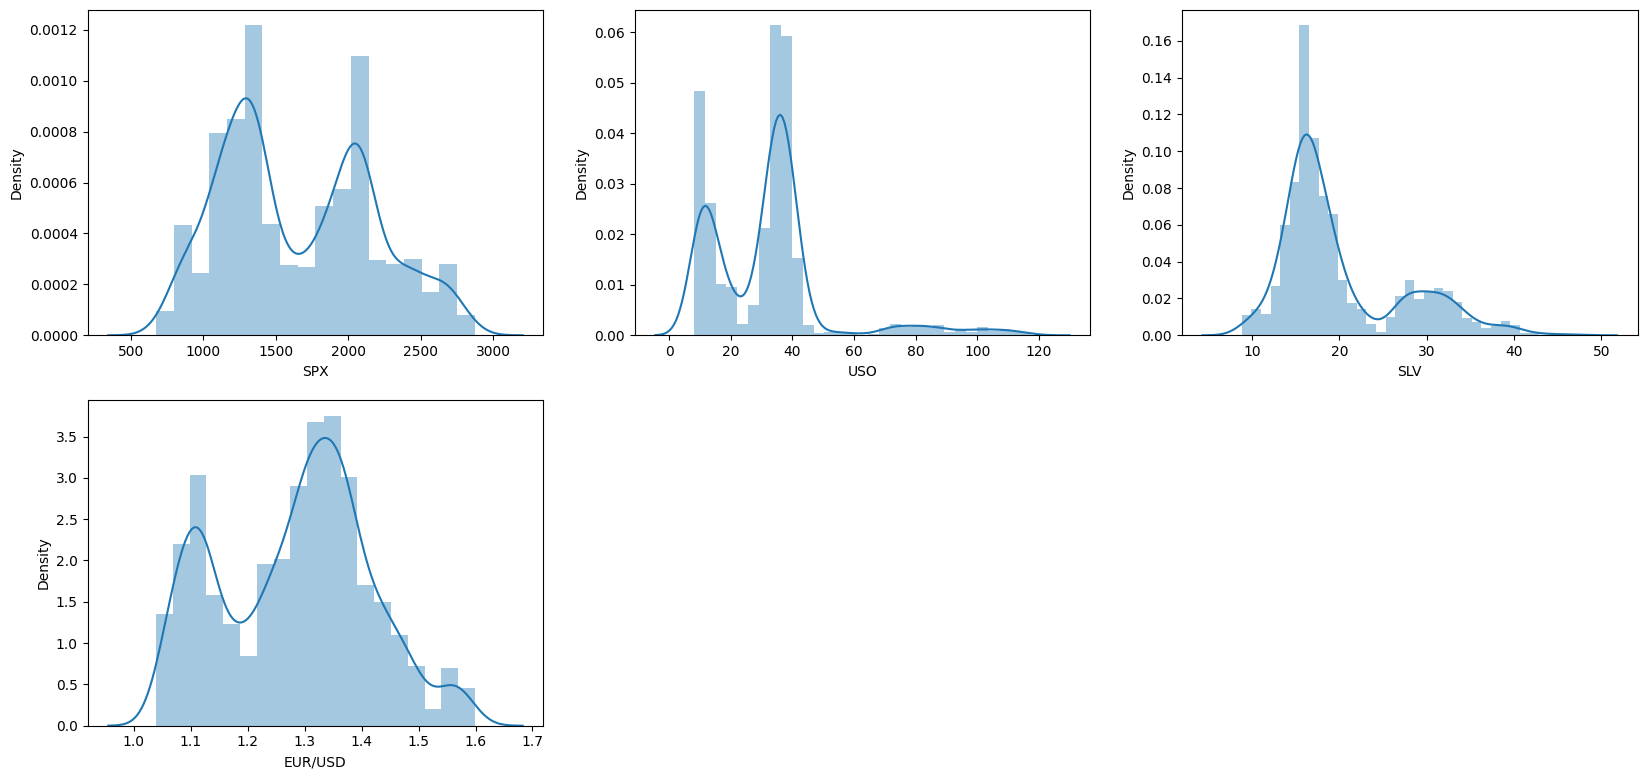

In [17]:
plt.figure(figsize=(20,60),facecolor = "white")
plotnumber = 1 

for continuous_feature in continuous_features : 
    ax = plt.subplot(12,3,plotnumber)
    sns.distplot(df[continuous_feature])
    plt.xlabel(continuous_feature)
    plotnumber +=1 

plt.show()

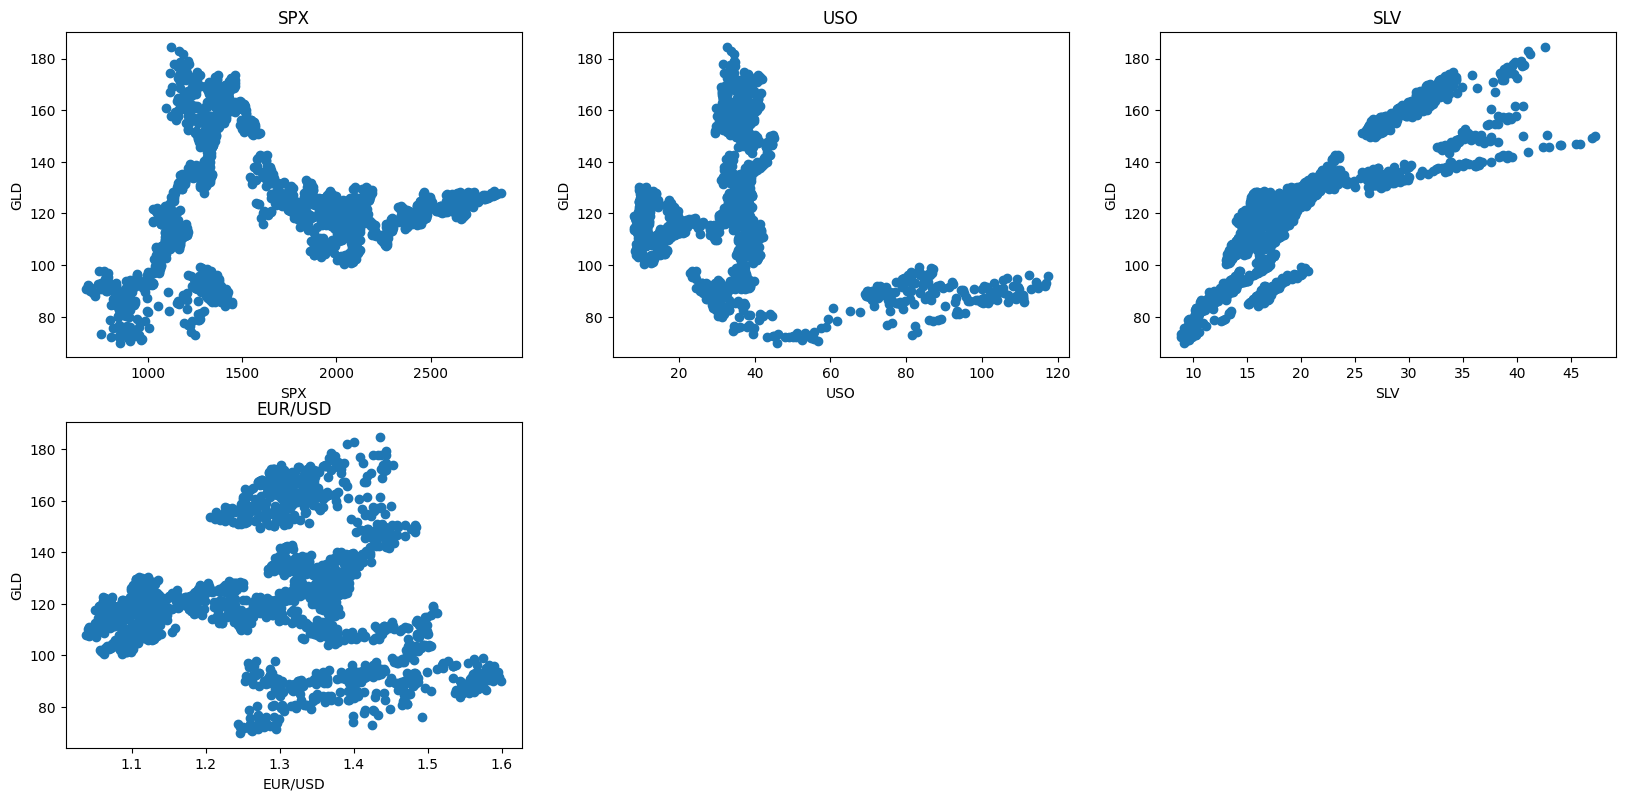

In [18]:
# Relation between numerical and continuous data
plt.figure(figsize=(20,60) , facecolor = "white")
plotnumber = 1 
for feature in continuous_features :
    data = df.copy()
    ax = plt.subplot(12,3,plotnumber)
    plt.scatter(data[feature],data["GLD"])
    plt.xlabel(feature)
    plt.ylabel("GLD")
    plt.title(feature)
    plotnumber +=1

plt.show()

In [19]:
# # Relation between numerical and continuous data
# plt.figure(figsize=(20,60) , facecoloor = "white")
# plotnumber = 1 
# for continuous_feature in continuous_features:
#     ax = plt.subplot(12,3,plotnumber)
#     sns.distplot(df[continuous_feature])
#     plt.Xlabel(continuous_feature)
#     plotnumber +=1

# plt.show()

plt.figure(figsize=(20,60) , facecolor = "white")
plotnumber = 1
for feature in continuous_features :
    data = df.copy()

<Figure size 2000x6000 with 0 Axes>

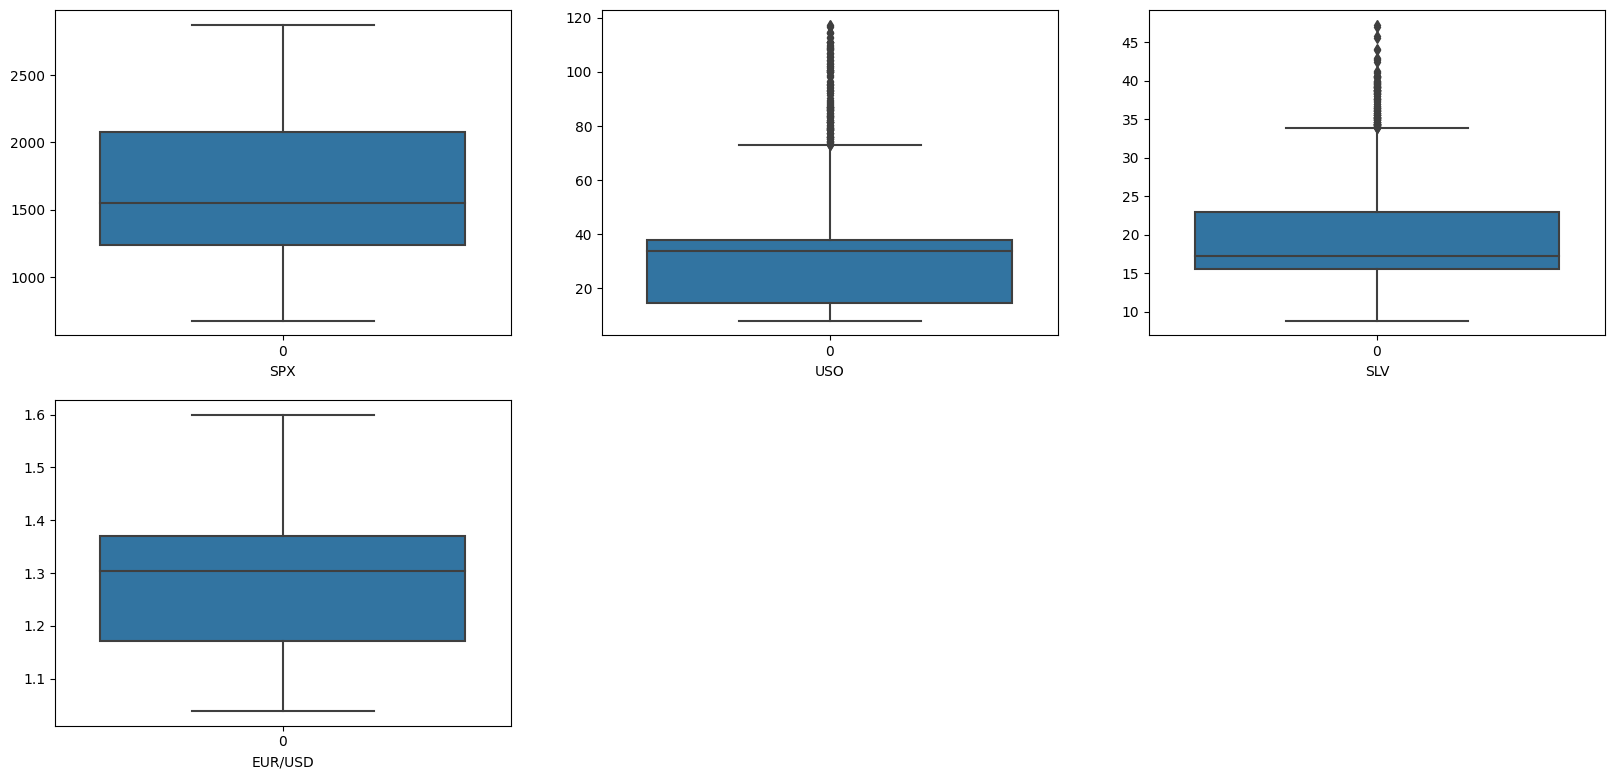

In [20]:
import seaborn as sns

plt.figure(figsize=(20, 60), facecolor="white")
plotnumber = 1

for numerical_feature in numerical_features:
    ax = plt.subplot(12, 3, plotnumber)
    sns.boxplot(df[numerical_feature])  # Use numerical_feature here
    plt.xlabel(numerical_feature)
    plotnumber += 1

plt.show()


C:\Users\mulak\AppData\Local\Temp\ipykernel_10392\1206489364.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor_mat = df.corr()


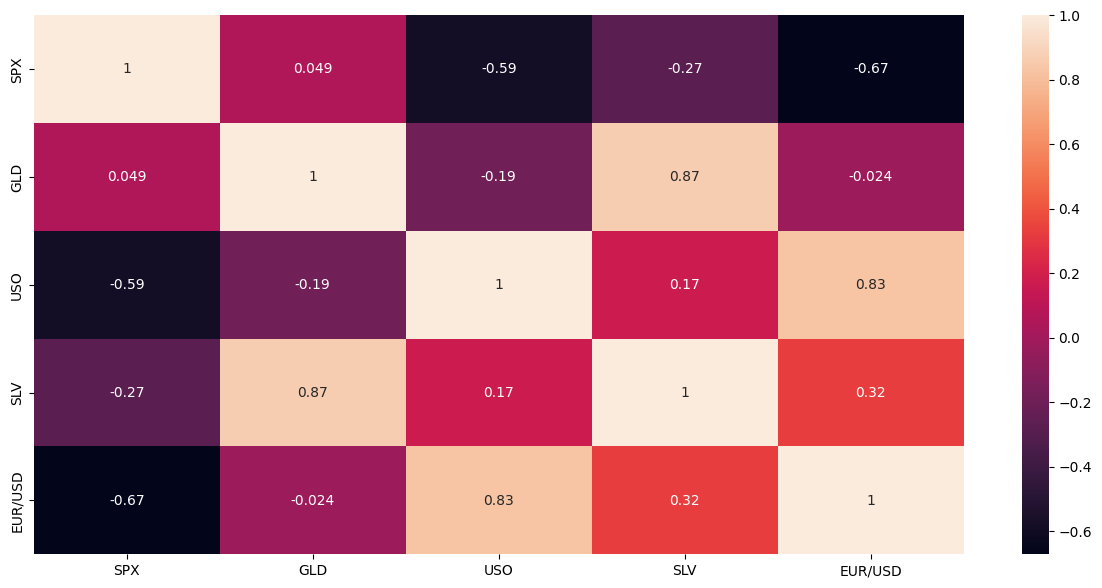

In [21]:
# checking the corelation
cor_mat = df.corr()
fig = plt.figure(figsize = (15,7))
sns.heatmap(cor_mat , annot =True )
plt.show()

In [22]:
print(cor_mat['GLD'].sort_values(ascending = False), '/n')

GLD        1.000000
SLV        0.866632
SPX        0.049345
EUR/USD   -0.024375
USO       -0.186360
Name: GLD, dtype: float64 /n


In [23]:
# drop unwanted Features 
# Handling Missings Values 
# Handling Categorical Features 
# Handle Features Scalling 
# Remove Outliers


In [24]:
df2 = df.copy()

In [25]:
df2.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [26]:
# drop date
df2.drop(['Date'], axis=1, inplace=True)
print(df2.columns)


Index(['SPX', 'GLD', 'USO', 'SLV', 'EUR/USD'], dtype='object')


In [27]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [28]:
# # split database into two training and testing data bases 
# X = df2.drop(["GLD",axis = 1])
# y = df2["GLD"]
# from sklearn.model_selection import train_test_split
# X_trian,X_test, y_train,y_test = train_test_split(X,y,test_size = 0.2 , ramdom_state = 0)
# Split the database into training and testing databases
X = df2.drop(["GLD"], axis=1)
y = df2["GLD"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [29]:
len(X_train)

1832

In [30]:
len(X_test)

458

In [31]:
len(y_test)

458

In [32]:
len(y_train)

1832

In [38]:
# Support vector machine
from sklearn import svm


In [47]:
# Create an SVM regression model with a linear kernel
svm_model = svm.SVR(kernel='linear', C=1.0, epsilon=0.2)

In [41]:
#svm_model = svm.SVR(kernel = "linear " , C = 1.0 , epsilon=0.2)

In [48]:
svm_model.fit(X_train , y_train)

SVR(epsilon=0.2, kernel='linear')

In [50]:
y_pred = svm_model.predict(X_test)

In [52]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test , y_pred)
mse

103.92796867199328

In [60]:
from sklearn.metrics import r2_score


  # X is your feature data
r2 = r2_score(y_test, y_pred)
r2


0.7979821263687846

In [62]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test,y_pred)
mae

5.615522583085847